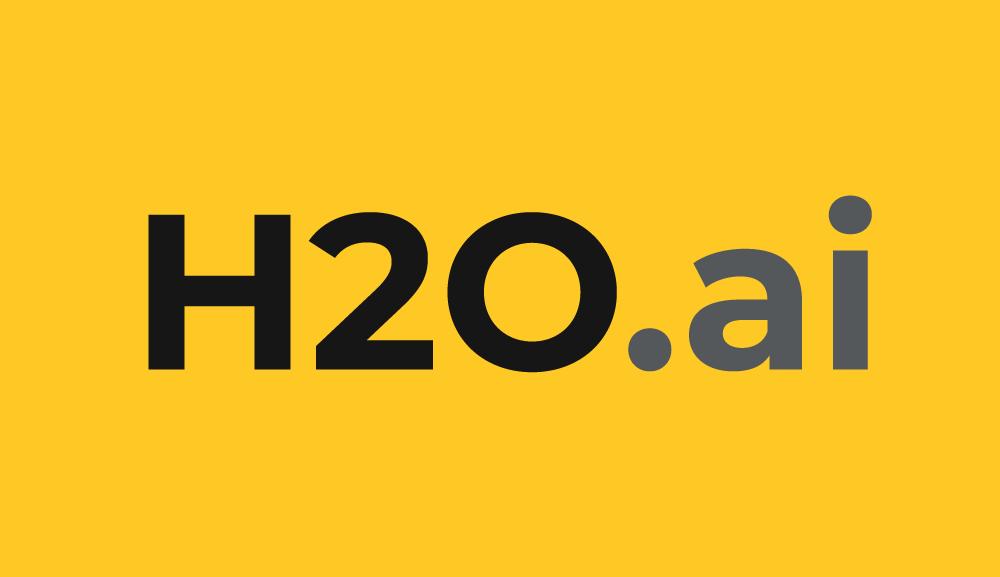

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import h2o
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from h2o.estimators import H2OIsolationForestEstimator
from h2o.frame import H2OFrame
from h2o.automl import H2OAutoML
from h2o.automl import get_leaderboard


import warnings
warnings.filterwarnings('ignore')

In [2]:
h2o.init(max_mem_size='16G')

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.23" 2024-04-16; OpenJDK Runtime Environment (build 11.0.23+9-post-Ubuntu-1ubuntu120.04.2); OpenJDK 64-Bit Server VM (build 11.0.23+9-post-Ubuntu-1ubuntu120.04.2, mixed mode, sharing)
  Starting server from /opt/conda/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp4nrogj8h
  JVM stdout: /tmp/tmp4nrogj8h/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp4nrogj8h/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.3
H2O_cluster_version_age:,1 month and 24 days
H2O_cluster_name:,H2O_from_python_unknownUser_h65sgr
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,16 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [3]:
train = h2o.import_file("/kaggle/input/playground-series-s4e8/train.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [4]:
train = train.drop(['id', 'veil-type'])

In [5]:
train.head(5)

class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-color,has-ring,ring-type,spore-print-color,habitat,season
e,8.8,f,s,u,f,a,c,w,4.51,15.39,,,w,,f,f,,d,a
p,4.51,x,h,o,f,a,c,n,4.79,6.48,,y,o,,t,z,,d,w
e,6.94,f,s,b,f,x,c,w,6.85,9.93,,s,n,,f,f,,l,w
e,3.88,f,y,g,f,s,,g,4.16,6.53,,,w,,f,f,,d,u
e,5.85,x,l,w,f,d,,w,3.37,8.36,,,w,,f,f,,g,a


In [6]:
test = h2o.import_file("/kaggle/input/playground-series-s4e8/test.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [7]:
test = test.drop(['veil-type'])

In [8]:
test.head(5)

id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-color,has-ring,ring-type,spore-print-color,habitat,season
3.11694e+06,8.64,x,,n,t,,,w,11.13,17.12,b,,w,w,t,g,,d,a
3.11695e+06,6.9,o,t,o,f,,c,y,1.27,10.75,,,n,,f,f,,d,a
3.11695e+06,2,b,g,n,f,,c,n,6.18,3.14,,,n,,f,f,,d,s
3.11695e+06,3.47,x,t,n,f,s,c,n,4.98,8.51,,,w,n,t,z,,d,u
3.11695e+06,6.17,x,h,y,f,p,,y,6.73,13.7,,,y,y,t,,,d,u


In [9]:
train.dim

[3116945, 20]

In [10]:
train.isna().sum()

12911015.0

In [11]:
train.types

{'class': 'enum',
 'cap-diameter': 'real',
 'cap-shape': 'enum',
 'cap-surface': 'enum',
 'cap-color': 'enum',
 'does-bruise-or-bleed': 'enum',
 'gill-attachment': 'enum',
 'gill-spacing': 'enum',
 'gill-color': 'enum',
 'stem-height': 'real',
 'stem-width': 'real',
 'stem-root': 'enum',
 'stem-surface': 'enum',
 'stem-color': 'enum',
 'veil-color': 'enum',
 'has-ring': 'enum',
 'ring-type': 'enum',
 'spore-print-color': 'enum',
 'habitat': 'enum',
 'season': 'enum'}

In [12]:
seed = 12345
ntrees = 100
isoforest = h2o.estimators.H2OIsolationForestEstimator(
 ntrees=ntrees, seed=seed)
isoforest.train(x=train.col_names[0:30], training_frame=train)
predictions = isoforest.predict(train)

predictions

isolationforest Model Build progress: |██████████████████████████████████████████| (done) 100%
isolationforest prediction progress: |███████████████████████████████████████████| (done) 100%


predict,mean_length
0.474308,4.68
0.312253,5.09
0.29249,5.14
0.438735,4.77
0.474308,4.68
0.442688,4.76
0.3083,5.1
0.577075,4.42
0.411067,4.84
0.403162,4.86


In [13]:
predictions.cor()

predict,mean_length
1,-1
-1,1


In [14]:
quantile = 0.95
quantile_frame = predictions.quantile([quantile])
quantile_frame

Probs,predictQuantiles,mean_lengthQuantiles
0.95,0.675889,5.38


In [15]:
target = 'class' 
X = [col for col in train.columns if col != target]

train[target] = train[target].asfactor()

In [16]:
data_types = {'class': 'enum','cap-diameter': 'real', 'cap-shape': 'enum',  'cap-color': 'enum', 'does-bruise-or-bleed': 'enum','gill-attachment': 'enum', 'gill-spacing': 'enum','gill-color': 'enum', 'stem-height': 'real','stem-width': 'real', 'stem-root': 'enum',  'stem-surface': 'enum', 'stem-color': 'enum',   'veil-color': 'enum',  'has-ring': 'enum', 'ring-type': 'enum', 'spore-print-color': 'enum',
    'habitat': 'enum','season': 'enum'}


for col in train.columns:
    if col != target:
        if col in data_types:
            if data_types[col] == 'real':
                train[col] = train[col].asnumeric()
            elif data_types[col] == 'enum':
                train[col] = train[col].asfactor()
        else:
            train[col] = train[col].asfactor()

In [17]:
aml = H2OAutoML(max_runtime_secs=3*3600,  
                seed=1,
                include_algos=['GBM', 'XGBoost'],
                nfolds=5,
                stopping_metric='AUC',  
                stopping_tolerance=0.001,
                stopping_rounds=5)
aml.train(x=X, y=target, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_1_20240805_64626


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          1.72712e+06            15           15           15            1658          2608          2215.34

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.006833111236537611
RMSE: 0.08266263506892102
LogLoss: 0.03619090379874354
Mean Per-Class Error: 0.007434378137575118
AUC: 0.998056314216127
AUCPR: 0.9983893687623205
Gini: 0.9961126284322539

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4993973210302205
       e            p            Error    Rate
-----  -----------  -----------  -------  -------------------
e      1.4016e+06   9949         0.007    (9949.0/1411549.0)
p      13337        1.69206e+06  0.0078   (13337.0/1705396.0)
Total  1.41494e+06  1.70201e+06  0.0075   (23286.0/3116945.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value        idx
---------------------------  -----------  -----------  -----
max f1                       0.499397     0.993166     195
max f2                       0.236867     0.993089     253
max f0point5                 0.731787     0.99418      150
max accuracy                 0.499397     0.992529     195
max precision                0.995876     1            0
max recall                   0.00593741   1            399
max specificity              0.995876     1            0
max absolute_mcc             0.499397     0.98493      195
max min_per_class_accuracy   0.445092     0.9925       206
max mean_per_class_accuracy  0.505115     0.992566     194
max tns                      0.995876     1.41155e+06  0
max fns                      0.995876     1.6838e+06   0
max fps                      0.00593741   1.41155e+06  399
max tps                      0.00593741   1.7054e+06   399
max tnr                      0.995876     1            0
max fnr                      0.995876     0.98734      0
max fpr                      0.00593741   1            399
max tpr                      0.00593741   1            399

Gains/Lift Table: Avg response rate: 54.71 %, avg score: 54.71 %
group    cumulative_data_fraction    lower_threshold    lift         cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -----------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100002                   0.995667           1.8277       1.8277             1                0.995839    1                           0.995839            0.0182773       0.0182773                  82.7696   82.7696            0.0182773
2        0.02                        0.995528           1.82764      1.82767            0.999968         0.99559     0.999984                    0.995714            0.0182761       0.0365534                  82.7637   82.7666            0.0365527
3        0.0300002                   0.995374           1.8274       1.82758            0.99984          0.995447    0.999936                    0.995625            0.0182743       0.0548277                  82.7403   82.7578            0.0548235
4        0.0400065                   0.995284           1.82758      1.82758            0.999936         0.995328    0.999936                    0.995551            0.0182872       0.073115                   82.7579  

In [18]:
aml.leader

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_1_20240805_64626


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          1.72712e+06            15           15           15            1658          2608          2215.34

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.006833111236537611
RMSE: 0.08266263506892102
LogLoss: 0.03619090379874354
Mean Per-Class Error: 0.007434378137575118
AUC: 0.998056314216127
AUCPR: 0.9983893687623205
Gini: 0.9961126284322539

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4993973210302205
       e            p            Error    Rate
-----  -----------  -----------  -------  -------------------
e      1.4016e+06   9949         0.007    (9949.0/1411549.0)
p      13337        1.69206e+06  0.0078   (13337.0/1705396.0)
Total  1.41494e+06  1.70201e+06  0.0075   (23286.0/3116945.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value        idx
---------------------------  -----------  -----------  -----
max f1                       0.499397     0.993166     195
max f2                       0.236867     0.993089     253
max f0point5                 0.731787     0.99418      150
max accuracy                 0.499397     0.992529     195
max precision                0.995876     1            0
max recall                   0.00593741   1            399
max specificity              0.995876     1            0
max absolute_mcc             0.499397     0.98493      195
max min_per_class_accuracy   0.445092     0.9925       206
max mean_per_class_accuracy  0.505115     0.992566     194
max tns                      0.995876     1.41155e+06  0
max fns                      0.995876     1.6838e+06   0
max fps                      0.00593741   1.41155e+06  399
max tps                      0.00593741   1.7054e+06   399
max tnr                      0.995876     1            0
max fnr                      0.995876     0.98734      0
max fpr                      0.00593741   1            399
max tpr                      0.00593741   1            399

Gains/Lift Table: Avg response rate: 54.71 %, avg score: 54.71 %
group    cumulative_data_fraction    lower_threshold    lift         cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -----------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100002                   0.995667           1.8277       1.8277             1                0.995839    1                           0.995839            0.0182773       0.0182773                  82.7696   82.7696            0.0182773
2        0.02                        0.995528           1.82764      1.82767            0.999968         0.99559     0.999984                    0.995714            0.0182761       0.0365534                  82.7637   82.7666            0.0365527
3        0.0300002                   0.995374           1.8274       1.82758            0.99984          0.995447    0.999936                    0.995625            0.0182743       0.0548277                  82.7403   82.7578            0.0548235
4        0.0400065                   0.995284           1.82758      1.82758            0.999936         0.995328    0.999936                    0.995551            0.0182872       0.073115                   82.7579  

In [19]:
leader_model = aml.leader

In [20]:
predictions = leader_model.predict(test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [21]:
predictions_h2o = predictions.as_data_frame()

In [22]:
submission = pd.DataFrame({'id': test['id'].as_data_frame()['id']})  
submission['class'] = (predictions_h2o['predict'].values)
submission.to_csv('submission.csv', index=False)

submission.head()

,id,class
0,3116945,e
1,3116946,p
2,3116947,p
3,3116948,p
4,3116949,e


In [23]:
h2o.shutdown()

H2O session _sid_87bf closed.
